# House Price Prediction

*by Padakanti Dhatri, Mohan Sai Mani Deepak Telaprolu November 23, 2022* 

## Introduction

- Interested in exploring the methods in libraries like NumPy, Pandas scikit-learn libraries and algorithms like regression, classification algorithms.
- NumPy is a powerful library which helps to perform many operations on arrays and matrices. It is very useful to perform operations quickly.
- Pandas is an extremely helpful library which can help in data cleaning.
- Scikit-learn features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. This library helps a lot in analyzing the data using the predefined methods for algorithms.
- Matplotlib library to plot the graphs during various instances. A graph can tell a great story compared to the text data.


Planned methods:

- We plan to read the data from the csv file and apply train on to it.
- Plan to plot scatter plot graphs , find outliers.
- We will be using LinearRegression(), Lasso() and DecisionTreeRegressor() methods.
- We will also be applying optimizers to the data. These include optimizers like Adam, and SGD
- After the training part we successfully implemented integrating the model to user interface.
- For this purpose we used Flask in python

## Methods

We will be using the data from kaggle - https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data. This data contains the area type, availability, location, size, society, total_sqft, bath, balcony and price fields. Using all the fields we will be generating the price which we can compare it with the actual price present in the input data. As we will be using Supervised learning, we need to have input and output values in the input file.

Independent variables: Area type, availability, location, size, society, total_sqft, bath and balcony are the independent variables.

Dependent variables: Price is a dependent variable.

Upon the above data we plan to apply regression algorithms. Regression is a type of supervised learning in Machine Learning that aids in mapping a prediction relationship between labels and data points. Some of the linear regression models that we planned to use are Linear Regression, Lasso and Decision Tree Regression.

Linear Regression: Linear regression is a technique that predicts the value of unknown data by using another related and known data value.

Lasso: Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

Decision Tree Regression: Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

We also plan to use optimization algorithms like Scaled Conjugate Gradient(SCG), Stochastic Gradient Descent(SGD) and Adaptive Moment Estimation (Adam).

SCG: It is a supervised learning algorithm for feedforward neural networks.

SGD: Stochastic Gradient Descent (SGD) fits linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.

Adam: Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.

Below table shows the milestones for our project:

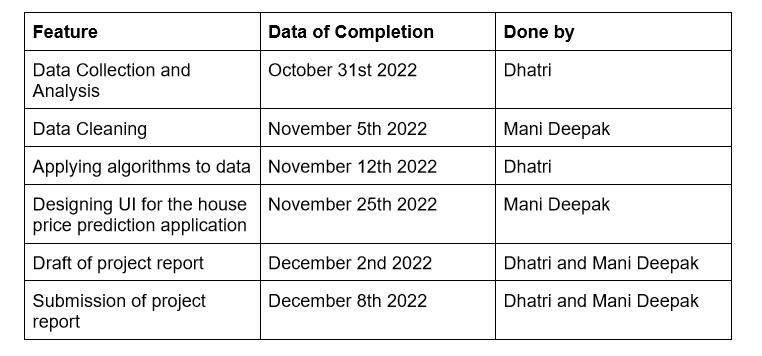

## Implementation

First step in the project is to read the csv file using the pandas framework. Next data cleaning was performed as discussed in detail below. 

Data Cleaning:

To keep the model simple we dropped some of the columns which might not have an impact in determining the price of a house. These are the columns we dropped

- area_type
- society
- availability
- balcony

After this step we are left with 3 dependent variables and 1 independent variable. When we examined if there are any null values in the dataframe we got the below results

- location       1
- size          16
- total_sqft     0
- bath          73
- price          0


It is extremely challenging to come up with a suitable criteria to fill the null values. Hence we decided the best strategy to deal with this situation is to drop them and take the values in a new dataframe.

Then we started to check the unique values of each column starting from size. Noticing many types of formats for this column (BHK / Bedroom) (BHK means Bedroom Hall Kitchen) we formatted to a uniform format by removing the suffix and changing the data type of column from string to integer.

The total_sqft also has 2 different formats. While some values have a single integer, a couple of values have ranges. So, first we checked if the value is an integer or not. If it is a range value then we took the average of lower range and upper range and updated the value.


To make the project more comfortable we added a column called price_per_sqft. To populate this column we multiplied the price with 100K and divided it with total_sqft value.

Coming to the location value we noticed that there are 1304 unique locations. Whitefield has appeared 535 times in the dataset while the least was Kanakapura road with a frequency of one. Initially we checked if there would be an impact if we drop the location_values having a frequency less than 10. But then we got around 1052 unique locations. Dropping 300 values can cost a major impact. Hence we renamed these values with other and dropped rows having a frequency less than 10.


## Visualizations, Outlier Detection and removal

In the real world, it is uncommon to see the property prices of 2 bedroom apartments are more than the 3 bedroom apartments for a similar number of total square feet. To check the number of such cases that exist in the input we used data visualizations. 

To perform such visualizations, we have written a method which takes data frame and location as an input. That method draws a scatter plot on which it will plot two bedroom and 3 bedroom apartments. The resultant plot is between total square feet area on x-axis and price on y-axis. Below images show that there are 2 bedroom apartments (plotted in blue color) with higher prices than 3 bedroom apartments (which are plotted in green color) for almost similar total number of square feet area. All this data would be irrelevant in the input for training the model. These are considered as outliers and we will be removing them. 

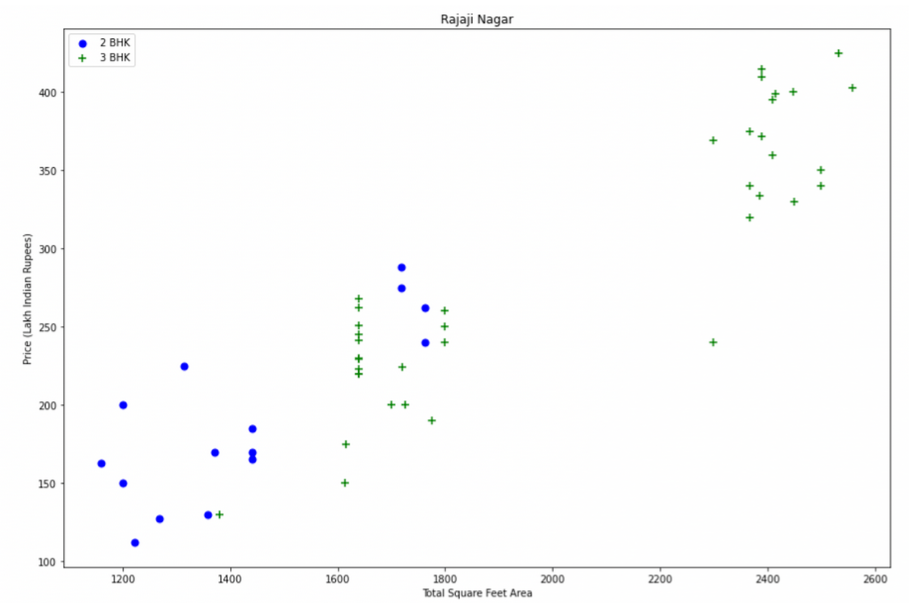

We created a function which removes these outliers. For every location in the dataframe we created a new dataframe based on bhk (number of bedrooms). Per bhk dataframe we computed mean, standard deviation and count. Then we excluded those data points whose values of price per square feet is less than the mean of previous bhk. For instance, for a 2 bedroom apartment we tried to filter all those property values whose price per square feet is less than the mean of one bedroom mean. Below is the code snippet of the method which removes the outliers


In [4]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

After removing the outliers, if we again plot the scatter plot we can see the improvements in the plot as shown below.

Finding outliers for bathroom feature: For example, if a 10 bhk apartment has 10 or 12 bathrooms it is believable but more number of bathrooms like 16 or 20 is unusual. Here, we assume if the number of bathrooms are more than the number of bedrooms plus 2, then all those data points are considered as outliers.

After performing data clean up from the data frame by removing all the outliers we made it ready for model building. We used k-fold cross validation and GridSearchCV to come up with the best algorithm and best parameters.

Machine learning models can not interpret text data. So, we converted location field text data into numeric data using one hot encoding ( which is also called as dummies). In order to do that we used the get_dummies method of the pandas library. We appended dummies into the main dataframe. While concating dummies into the main data frame, to avoid a dummy variable trap we dropped the last column which is ‘other’. Finally, the location column is dropped as they are covered in dummies columns.


### Model Training:

We created a variable which contains only independent variables. So the price is dropped from the dataframe and stored in that variable. We also created another variable which contains only dependent variables (price is only dependent variable in this input) so we stored only price in that variable.

To train the model, we used the train_test_split method from sklearn [3] model_selection. We used 20 percent of the sample for testing and the remaining 80 percent of it is used for training.


### Linear Regression

In this case the equation for the linear regression looks something like this:
Price = m1 * total_sqft + m2 * location + m3 * bhk + …. + b

price is the dependent variable
m1, m2, m3 are slopes
total_sqft, location are called as independent variable or features

In linear regression we plot a straight line that covers maximum data points of features. We can draw many straight lines for a single model. The best straight line is observed which has the least error. Error is calculated by using the below function
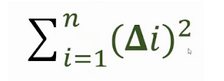

Where i represents the vertical difference between a data point and the value that is represented on the line.


In order to reduce the difficulty in finding the best line that fits through the maximum data points we can use the scikit-learn library in python to do the job for us. LinearRegression is available under linear model class. The fit method is used to train the model and accepts 2 parameters. The first one is a list consisting of all the dependent variables or features and the second one is the independent variable. 

During the implementation we checked for the hyperparameter normalize for true and false. Generally this parameter depends on another parameter called fit_intercept. If fit_intercept is set to false then intercept is not calculated and the data is going to be centric. If this is set to false then normalize parameter doesn’t have any impact. 


After training the model using the fit method we can use the predict method to predict for new values. The drawback of linear regression is that there are many possibilities that we may get underfitting of the curve which can lead to false prediction of values. To overcome this limitation we can consider another model called Lasso which can give better results.

### Lasso

A potent regression technique called Least Absolute Selection and Shrinking Operator [4] (LASSO) seeks to make the solution sparse.
This attribute is derived via minimization of a smooth quadratic cost function plus a non-smooth 1-norm term in a 1-regularized least squares cost function.

The method is frequently used in the areas of compressed sensing, feature selection, machine learning, and filtering.
The so-called Ridge regression, also known as 2-regularized least squares, is a popular regressor in these disciplines since it minimizes a certain quadratic cost and is comparable to a deterministic Kalman filter from the standpoint of control engineering.

The latter does not yield sparse estimates and is not meant to. On the other hand, when the cost is positive definite, the Kalman filter's solution is seamless and distinct. The Elastic-net, a hybrid of the two, is taken into consideration in this thesis.  

The elastic-net, an effective combination of the two regressors, enables one to control the trade-off between the sparsity of LASSO and the smoothness of Ridge regression.
Depending on the data, elastic-net can also sparsify collections of variables at once.
Since this regressor can be viewed as a specific instance of LASSO (Zou and Hastie 2005), only the word LASSO and the notation "lasso-MPC" are used in this thesis.
However, elastic-net regression is the foundation of the suggested controller. 

Underfitting and overfitting are the 2 major problems while training a machine learning model. Since there are multiple independent variables we might get an under fitting problem. But if we go for a higher order equation to fit the values it might be a problem as well. To get to the middle level of this problem we can use Lasso distribution. There are 2 kinds of regularization known as L1 and L2. In this case the equation looks something like this:

price = m1 * location + m2 * area ^ 2 + m3 * total_sqft * 3 + … +

But when the degree of the equation is more than 3 we may get the problem of overfitting. So, we need to find a way to make m3 and m4 zero. The modified formula to calculate the error is:
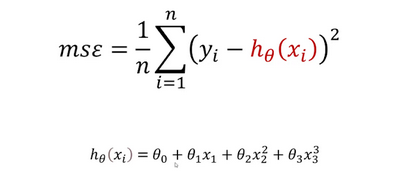

In the above case we don’t get a way to actually make the parameters as zero. Hence we introduce a special penalty in the below equation. The higher the slope value becomes the higher the penalty value. This concept is called regularization.

This is the equation for L1 regularization. Here in this case we will be using the absolute values of the slopes.

This is the equation for L2 regularization. In this case we will be using the squared values of the slopes. That’s the difference between these 2. When we consider the hyper parameters for Lasso in sklearn we will come across a parameter called alpha. 

### Decision Tree Regressor

Decision Trees (DTs) are a non-parametric supervised learning technique  and effective for solving classification and regression issues which has its roots in machine learning theory. The decision tree is based on a multistage or hierarchical decision scheme or a tree-like structure, in contrast to other classification systems that use a collection of characteristics (or bands) together to accomplish classification in a single decision step. Therefore, the fundamental idea behind a decision tree is to divide a complex decision into multiple simpler decisions, which might result in a more understandable solution. [5] The objective is to learn straightforward decision rules derived from the data features in order to build a model that predicts the value of a target variable. A piecewise constant approximation of a tree can be thought of.


Decision trees incrementally develop an associated decision tree while segmenting a dataset into smaller and smaller sections. The outcome is a tree containing leaf nodes and decision nodes.

Two or more branches represent different values for the attribute being tested in a decision node. A choice regarding the numerical aim is represented by a leaf node. The root node is the topmost decision node in a tree and corresponds to the best predictor. Both category and numerical data can be processed using decision trees.

Some of the algorithms used to split nodes in Decision Trees are:

ID3 - ID3 stands for Iterative Dichotomiser 3. ID3 uses a top down greedy strategy to split the nodes. During every iteration the local best attribute is selected and the split occurs at that node. The performance of this algorithm can be improved by using backtracking.

Information Gain assesses how well a certain characteristic categorizes or separates the target classes and determines the reduction in entropy. The best feature is determined by its Information Gain score. Entropy is a measure of disorder in the dataset and it is calculated using the below formula

Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n

Where S represents the dataset, n is the number of classes in the target attribute and p represents the probability class of the given attribute. After calculating the entropy information gain is calculated as

IG(S, B) = Entropy(S) - ∑((|Sᵥ| / |S|) * Entropy(Sᵥ))


Sᵥ represents the set of rows in S for which column value B has a value v

CART - CART stands for Classification and Regression Trees. Sklearn uses an optimized version of CART without the support of categorical variables. Similar to ID3 CART also uses greedy strategy. This algorithm is one of the oldest to predict the new outcome based on the given values. Since we are predicting the prices using the old values I guess this is an ideal algorithm to split the nodes in a decision tree regressor.

Criterion - The impurity during the split can be measured by various means. We can give various values to criterion parameter to check which one works best. Here in this case we considered Mean Square Error (mse) and Friedman Mean Square Error (friedman_mse)

Mean Square Error - The difference between the obtained value and target value is calculated. This is one of the commonly used techniques to find the best values. The difference is calculated and squared to avoid any negative values. The attribute having the least error is chosen. Below is the mathematical representation for mean square error.


Splitter - Splitting is the process of dividing a node into subnodes. There are 2 strategies to accomplish this process when it comes to decision tree regressor. While the first one is best, the second one is random. When the value is given as the best, the node which satisfies the best criterion is chosen while splitting. Coming to random, the word speaks for itself. A random attribute is chosen during the split.


### MultiLayer Perceptron Regressor:

Unlike other statistical techniques the multilayer perceptron makes no prior assumptions concerning the data distribution. It can model highly non-linear functions and can be trained to accurately generalise when presented with new, unseen data.[1] MLP Regressors are trained iteratively because partial derivatives of the loss function with respect to the model parameters are generated at each time step and used to update the parameters.

Additionally, a regularization term that reduces model parameters to avoid overfitting can be included in the loss function.

This implementation supports both dense and sparse floating point numpy arrays of data.

We used MLP Regressor with sgd and adam optimizers as parameters.

### Stochastic gradient descent

SGD, or stochastic gradient descent, is the "classical" optimization algorithm.It belongs to the gradient descent method.[2] In SGD, we calculate the network loss function's gradient with respect to each network weight separately. Each forward pass through the network results in a certain parameterized loss function, and we use each of the gradients we've created for each of the weights, multiplied by a certain learning rate, to move our weights in whatever direction its gradient is pointing.

The SGD algorithm is the most basic, both conceptually and in terms of how it operates. The gradient on the cost surface is always followed by SGD if the learning rate is sufficiently low. Each iteration's new weights will always be objectively superior to the old ones from the preceding iteration.

### Adaptive Moment Estimation

Adam optimizer is the extended version of stochastic gradient descent which could be implemented in various deep learning applications. The method is really efficient when working with large problems involving a lot of data or parameters. It requires less memory and is efficient.

### Activation Functions

While using the optimisers we need to use activation functions. We considered tanh and relu activation functions for our project.

Relu - Relu stands for Rectified Linear Unit and one of the popular activation functions used in Machine Learning and Deep learning field. It works in a simple way. This function returns zero if it receives a negative input and returns the same value if a positive value is given as input to the function. The mathematical representation is:

f(x) = max(0, x)
The graphical representation of this function looks like: Range of this function is [0, inf)

Tanh - Tanh activation function is one of the popular activation functions when it comes to multi-layer neural networks. Tanh is a continuous curve. The range of the function is from -1 to + 1 (exclusive of both the values). So unlike the Relu activation function this is not a linear function. Below is the mathematical representation of the tanh activation function.



### Methodology

We considered the below model and compared the best score. While using them we made sure that we consider the hyper parameters to get better results.

Linear Regression -  with parameter normalize by using True and False values
Lasso - Parameter alpha with values 1, 2 and another parameter selection with values random and cyclic
Decision Tree Regressor - Used parameter criterion with values mse and friedman_mse. Second parameter splitter by using values best and random.
Linear Regression - Parameter solver by using optimisers adam and sgd. One more parameter is called activation. We used tanh and relu activation functions to compare the model.

We used GridSearchCv that is available in sklearn to check for the best model using all the hyper parameters. The popular methods are fit and score. While the fit method is used to train with the given set of parameters, the score method returns the score on the given data.

## Results

When we implemented GridSearchCv we got the below scores.

From above data we got the best result when we used linear regression with Relu as activation function and adam optimiser. Then we started to predict the values by using the best model we obtained.

We extended this project by implementing a backend server which we developed using the flask server by giving a couple of routing points. 

One of the routing end points is get_location_names where all the locations available in the dataset will be displayed. The GET method is used for this purpose. 

For the prediction part we implemented another routing point called predict_home_prices. This routing point uses the POST method and takes the values of location total_sqft,, bhk, bath as input. A JSON response is returned consisting of the estimated price value. We used the postman application to check if the routing points are working as per requirement. Below are the images

A user interface will be displayed to the user which asks them to select the area, number of bedrooms, bathrooms and location. After the user enters all the details, the estimated price will be calculated and displayed to the user.

Below is the image of the user interface created.

For example if the user enters the details as shown in the below image, the generated response will be shown back to the user as depicted below.


## Conclusions

- We learnt about regression algorithms and implementation of them.

- One of the difficult steps was to use optimisers for linear regression. Initially we thought of using the back propagation and implementing our own optimisers just like we did in the assignments. However, we found out that it is being too complicated and making the whole project in a confused manner. After searching for a while we found out about a special method in sklearn called MLP regressor. This has made our job easier. In addition to including optimizers in that method we also added activation functions like Tanh and Relu.

- One of the surprising results was observed while comparing Relu and Tanh activation functions. We thought that Relu function might not have great impact compared to Tanh function since it is a kind of linear function and Tanh might give great results as it is an exponential curve. However, our assumption was wrong. We got a higher score for the Relu activation function.

- GridSearchCv is also another great method we came across. Instead of using nested for loops and trying each and every hyper parameter, we can simply use the methods fit and train to find out the best hyper parameters.

- Before we started working on this project we thought that integration of the front end with the prediction model might be a difficult step in this project. As expected that step was difficult when compared with other parts of the project.


### References

1. M.W Gardner, S.R Dorling, Artificial neural networks (the multilayer perceptron)—a review of applications in the atmospheric sciences, Atmospheric Environment, Volume 32, Issues 14–15, 1998, Pages 2627-2636, ISSN 352-2310, https://doi.org/10.1016/S1352-2310(97)00447-0. (https://www.sciencedirect.com/science/article/pii/S1352231097004470)

2. L. Guo, M. Li, S. Xu and F. Yang, "Application of Stochastic Gradient Descent Technique for Method of Moments," 2020 IEEE International Conference on Computational Electromagnetics (ICCEM), 2020, pp. 97-98, doi: 10.1109/ICCEM47450.2020.9219400.

3. Bisong, E. (2019). Introduction to Scikit-learn. In: Building Machine Learning and Deep Learning Models on Google Cloud Platform. Apress, Berkeley, CA. https://doi.org/10.1007/978-1-4842-4470-8_18

4. Marco Gallieri. 2016. Lasso-MPC - Predictive Control with 1-Regularised Least Squares (1st. ed.). Springer Publishing Company, Incorporated.

5. Jk Min Xu, Pakorn Watanachaturaporn, Pramod K. Varshney, Manoj K. Arora, Decision tree regression for soft classification of remote sensing data, Remote Sensing of Environment, Volume 97, Issue 3, 2005, Pages 322-336, ISSN 0034-4257, https://doi.org/10.1016/j.rse.2005.05.008. (https://www.sciencedirect.com/science/article/pii/S0034425705001604)

In [5]:
import io
import nbformat
import glob
nbfile = glob.glob('Final Project Report.ipynb')
print(nbfile)
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

['Final Project Report.ipynb']
Word count for file Final Project Report.ipynb is 4008
